📉 Gaussian Naïve Bayes Classification Results:
Accuracy: 0.7510
Confusion Matrix:
[[192  10   4   0   0]
 [ 12 152  41   0   0]
 [  0  68  97  33   0]
 [  0   0  37 130  27]
 [  0   0   0  17 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       206
           1       0.66      0.74      0.70       205
           2       0.54      0.49      0.51       198
           3       0.72      0.67      0.70       194
           4       0.87      0.91      0.89       197

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



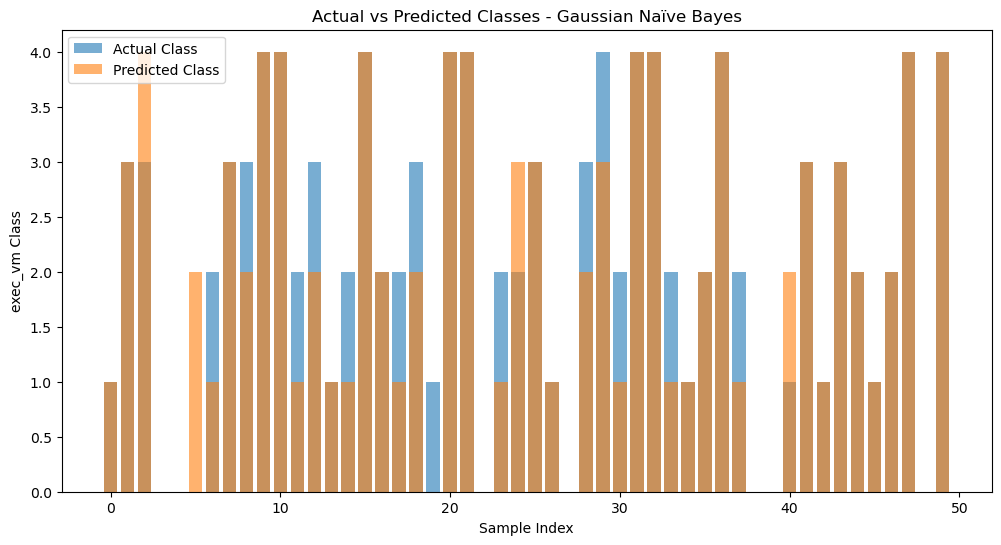

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

csv_file_path = "Malware dataset.csv"  
df = pd.read_csv(csv_file_path)

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
target_variable = correlation_matrix.abs().sum().idxmax()

sampled_df = numeric_df.sample(n=5000, random_state=42)

X = sampled_df.drop(columns=[target_variable])
y = sampled_df[target_variable]

y_binned = pd.qcut(y, q=5, labels=False)  # Convert to 5 classes based on quantiles

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"📉 Gaussian Naïve Bayes Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

plt.figure(figsize=(12, 6))
plt.bar(range(50), y_test[:50], label="Actual Class", alpha=0.6)
plt.bar(range(50), y_pred[:50], label="Predicted Class", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel(f"{target_variable} Class")
plt.title(f"Actual vs Predicted Classes - Gaussian Naïve Bayes")
plt.legend()
plt.show()
